In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf

In [2]:
data_dir = 'K:\\DataMiningProject\\myTrainSet\\'
img_height, img_width = (360, 640)
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6386 files belonging to 4 classes.
Using 5109 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6386 files belonging to 4 classes.
Using 1277 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4']


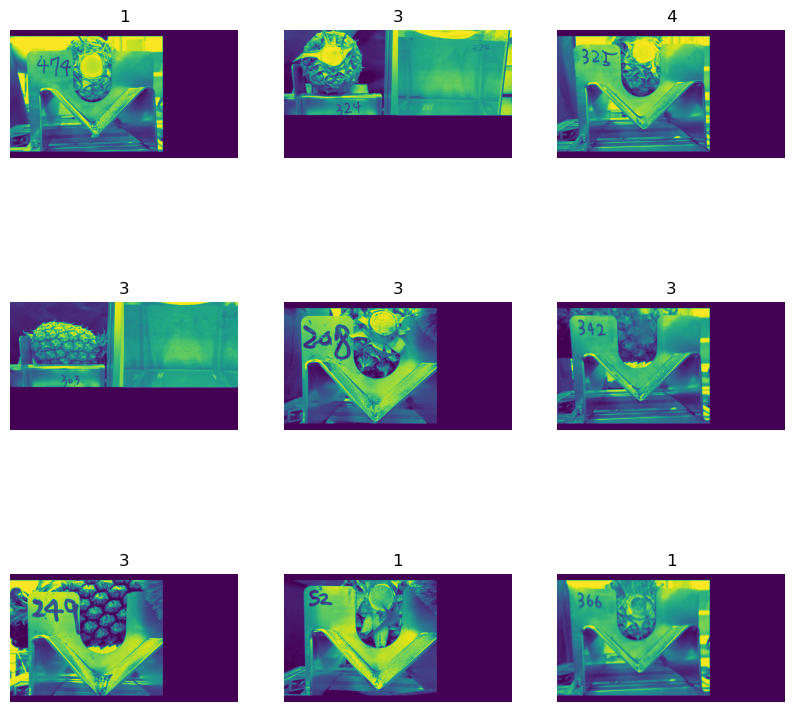

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

num_classes = len(train_ds.class_names)

(32, 360, 640, 1)
(32,)


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.build((1, img_height, img_width,1 ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (1, 360, 640, 1)          0         
                                                                 
 conv2d (Conv2D)             (1, 358, 638, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (1, 179, 319, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (1, 177, 317, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 88, 158, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (1, 86, 156, 32)          9

In [10]:
model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=64,
  epochs=10
)

Epoch 1/10
160/160 [==============================] - 552s 3s/step - loss: 1.0567 - accuracy: 0.6046 - val_loss: 0.8632 - val_accuracy: 0.6453
Epoch 2/10
160/160 [==============================] - 901s 6s/step - loss: 0.6668 - accuracy: 0.7338 - val_loss: 0.6438 - val_accuracy: 0.7142
Epoch 3/10
160/160 [==============================] - 969s 6s/step - loss: 0.3739 - accuracy: 0.8587 - val_loss: 0.4270 - val_accuracy: 0.8301
Epoch 4/10
160/160 [==============================] - 684s 4s/step - loss: 0.1735 - accuracy: 0.9378 - val_loss: 0.4051 - val_accuracy: 0.8559
Epoch 5/10
160/160 [==============================] - 518s 3s/step - loss: 0.1123 - accuracy: 0.9605 - val_loss: 0.5024 - val_accuracy: 0.8622
Epoch 6/10
160/160 [==============================] - 563s 4s/step - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.2817 - val_accuracy: 0.9013
Epoch 7/10
160/160 [==============================] - 504s 3s/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.1887 - val_accuracy: 0.9350

In [11]:
from sklearn.metrics import accuracy_score
true_categories = tf.concat([y for x, y in val_ds], axis=0)
predictions = model.predict(val_ds, verbose=2 ) 
flattened_predictions =  predictions.argmax(axis=1)
accuracy = accuracy_score(true_categories, flattened_predictions)
print ("Accuracy = ", accuracy)
model.save('model_test.h5')

40/40 - 23s - 23s/epoch - 572ms/step
Accuracy =  0.9584964761158966


# Test set Predict

In [12]:
data_dir = 'K:\\DataMiningProject\\Test set\\'
img_height, img_width = (360, 640)
batch_size = 32

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode=None,
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 0 files belonging to 1 classes.


ValueError: No images found in directory K:\DataMiningProject\Test set\. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
pred_y = model.predict(test_ds)
# 屬於哪一類 : pred_y[index]+1
np.argmax(pred_y[0]+1)

7/7 [==============================] - 4s 603ms/step


2

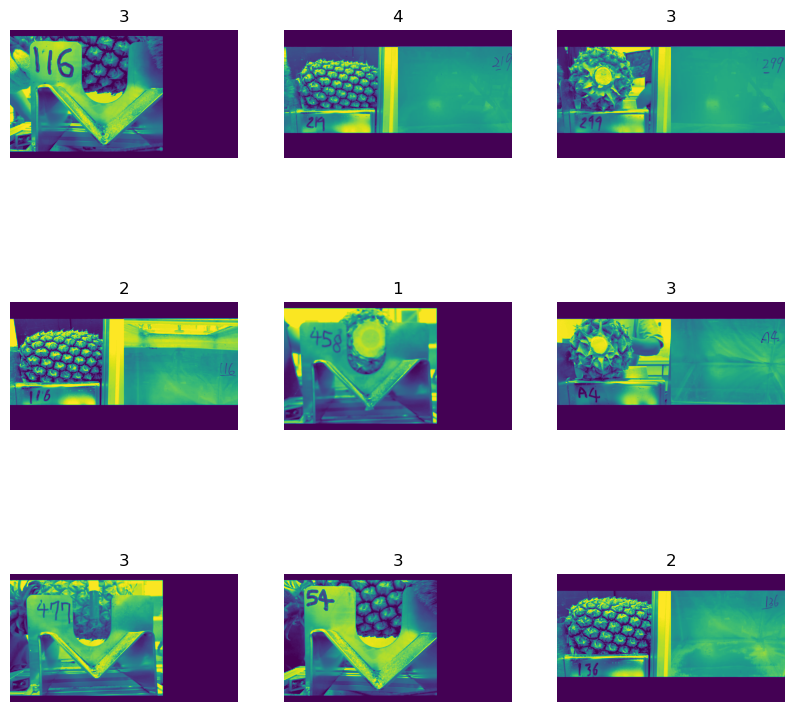

In [ ]:
plt.figure(figsize=(10, 10))
for images in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(np.argmax(pred_y[i])+1)
    plt.axis("off")